### In this notebook we make sure that the initial condition that MOM6 writes matches the initial conditions that we supply in the MARBL input files
### In particular, we want to make sure that the vertical regridding is being handled correctly (turns out it is!)

In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [53]:
%pwd
# The initial condition file written by MOM6 when initializing the model:
MOM_IC = xr.open_dataset('/glade/u/home/eyankovsky/MOM6-examples/ocean_only/my_single_column/KPP/MOM_IC.nc')

# The initial condition file that we supplied:
MARBL_input = xr.open_dataset('/glade/u/home/eyankovsky/MOM6-examples/ocean_only/my_single_column/KPP/INPUT/BATS/IC_FILE_COLUMN.nc')

print('finished reading data')

finished reading data


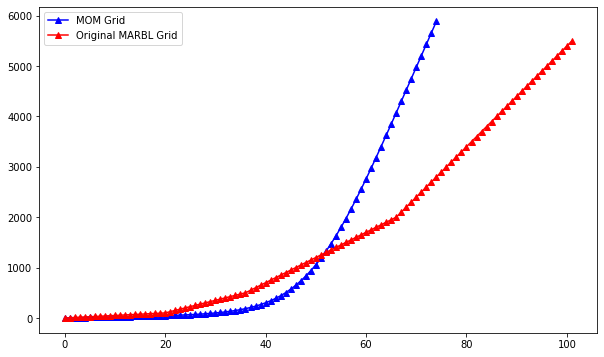

In [54]:
# Can see that the depth coordinates differ (as we expect):
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(MOM_IC.Layer)),MOM_IC.Layer,"b-^",label = 'MOM Grid')
plt.plot(np.arange(len(MARBL_input.DEPTH)),MARBL_input.DEPTH,"r-^",label='Original MARBL Grid')
plt.legend()

In [55]:
keys = list(MARBL_input.keys())
print(keys)
print(len(keys))

['TEMP', 'SALT', 'NO3', 'PO4', 'SiO3', 'O2', 'DIC', 'ALK', 'spC', 'spChl', 'spFe', 'spP', 'spCaCO3', 'diatC', 'diatChl', 'diatFe', 'diatP', 'diatSi', 'diazC', 'diazChl', 'diazFe', 'diazP', 'zooC', 'DOC', 'DOCr', 'DON', 'DONr', 'DOP', 'DOPr', 'NH4', 'Fe', 'Lig', 'DIC_ALT_CO2', 'ALK_ALT_CO2']
34


In [56]:
print(MOM_IC)

<xarray.Dataset>
Dimensions:                (Interface: 76, Layer: 75, Time: 1, lath: 2, latq: 3, lonh: 2, lonq: 3)
Coordinates:
  * lath                   (lath) float64 31.25 31.75
  * lonh                   (lonh) float64 -29.75 -29.25
  * latq                   (latq) float64 31.0 31.5 32.0
  * lonq                   (lonq) float64 -30.0 -29.5 -29.0
  * Layer                  (Layer) float64 1.0 3.0 5.0 ... 5.659e+03 5.886e+03
  * Interface              (Interface) float64 0.0 2.0 4.0 ... 5.773e+03 6e+03
  * Time                   (Time) timedelta64[ns] 00:00:00
Data variables:
    Temp                   (Time, Layer, lath, lonh) float64 ...
    Salt                   (Time, Layer, lath, lonh) float64 ...
    h                      (Time, Layer, lath, lonh) float64 ...
    u                      (Time, Layer, lath, lonq) float64 ...
    v                      (Time, Layer, latq, lonh) float64 ...
    frazil                 (Time, lath, lonh) float64 ...
    ave_ssh                (

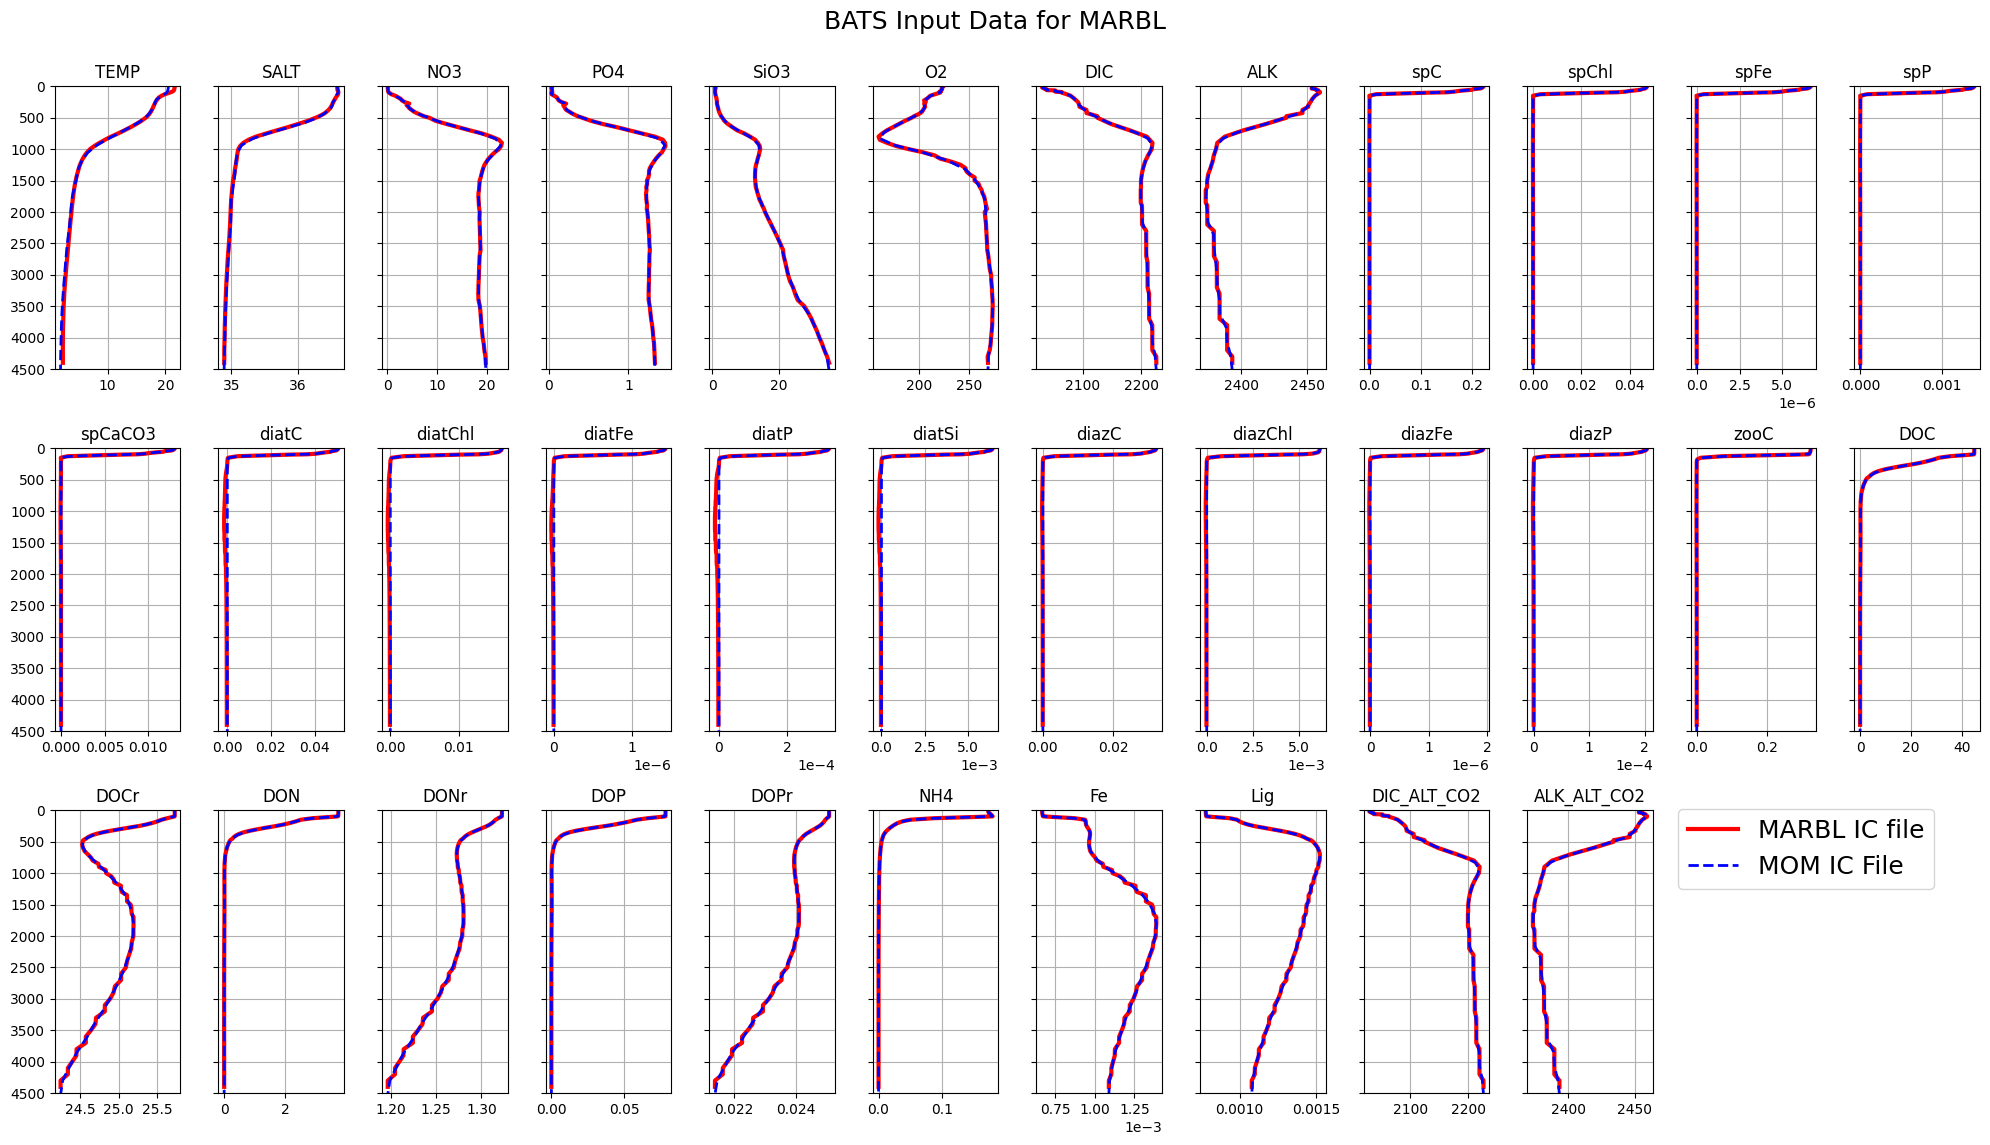

In [66]:
fig, axs = plt.subplots(nrows=3, ncols=13, figsize=(20, 12), sharey = True, dpi=100)
fig.suptitle("BATS Input Data for MARBL", fontsize=18, y=0.95)

for key, ax in zip(keys, axs.ravel()):
    ax.plot(MARBL_input[key][:,0,0],MARBL_input.DEPTH,'r',linewidth=3)
    ax.set_ylim([4500, 0])
    ax.set_title(key)
    ax.grid()
    #ax.set_xlabel(IC_FILE_COLUMN[key].units)
    ax.ticklabel_format(style='plain', axis='x')
    if key in ['spFe','diatFe','diatSi','diazChl','diatP','diazFe','diazP','Fe']:
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    if key == 'SALT':
        key = 'Salt'
    if key == 'TEMP':
        key = 'Temp'
    ax.plot(MOM_IC[key][0,:,0,0],MOM_IC.Layer,'--b',linewidth=2)

#fig.delaxes(axs[-1][-1])
#fig.delaxes(axs[-1][-2])
fig.tight_layout(rect=[0, 0, 1, 0.95])
ax.legend(['MARBL IC file','MOM IC File'],bbox_to_anchor=(1.1, 1.05),fontsize=18)



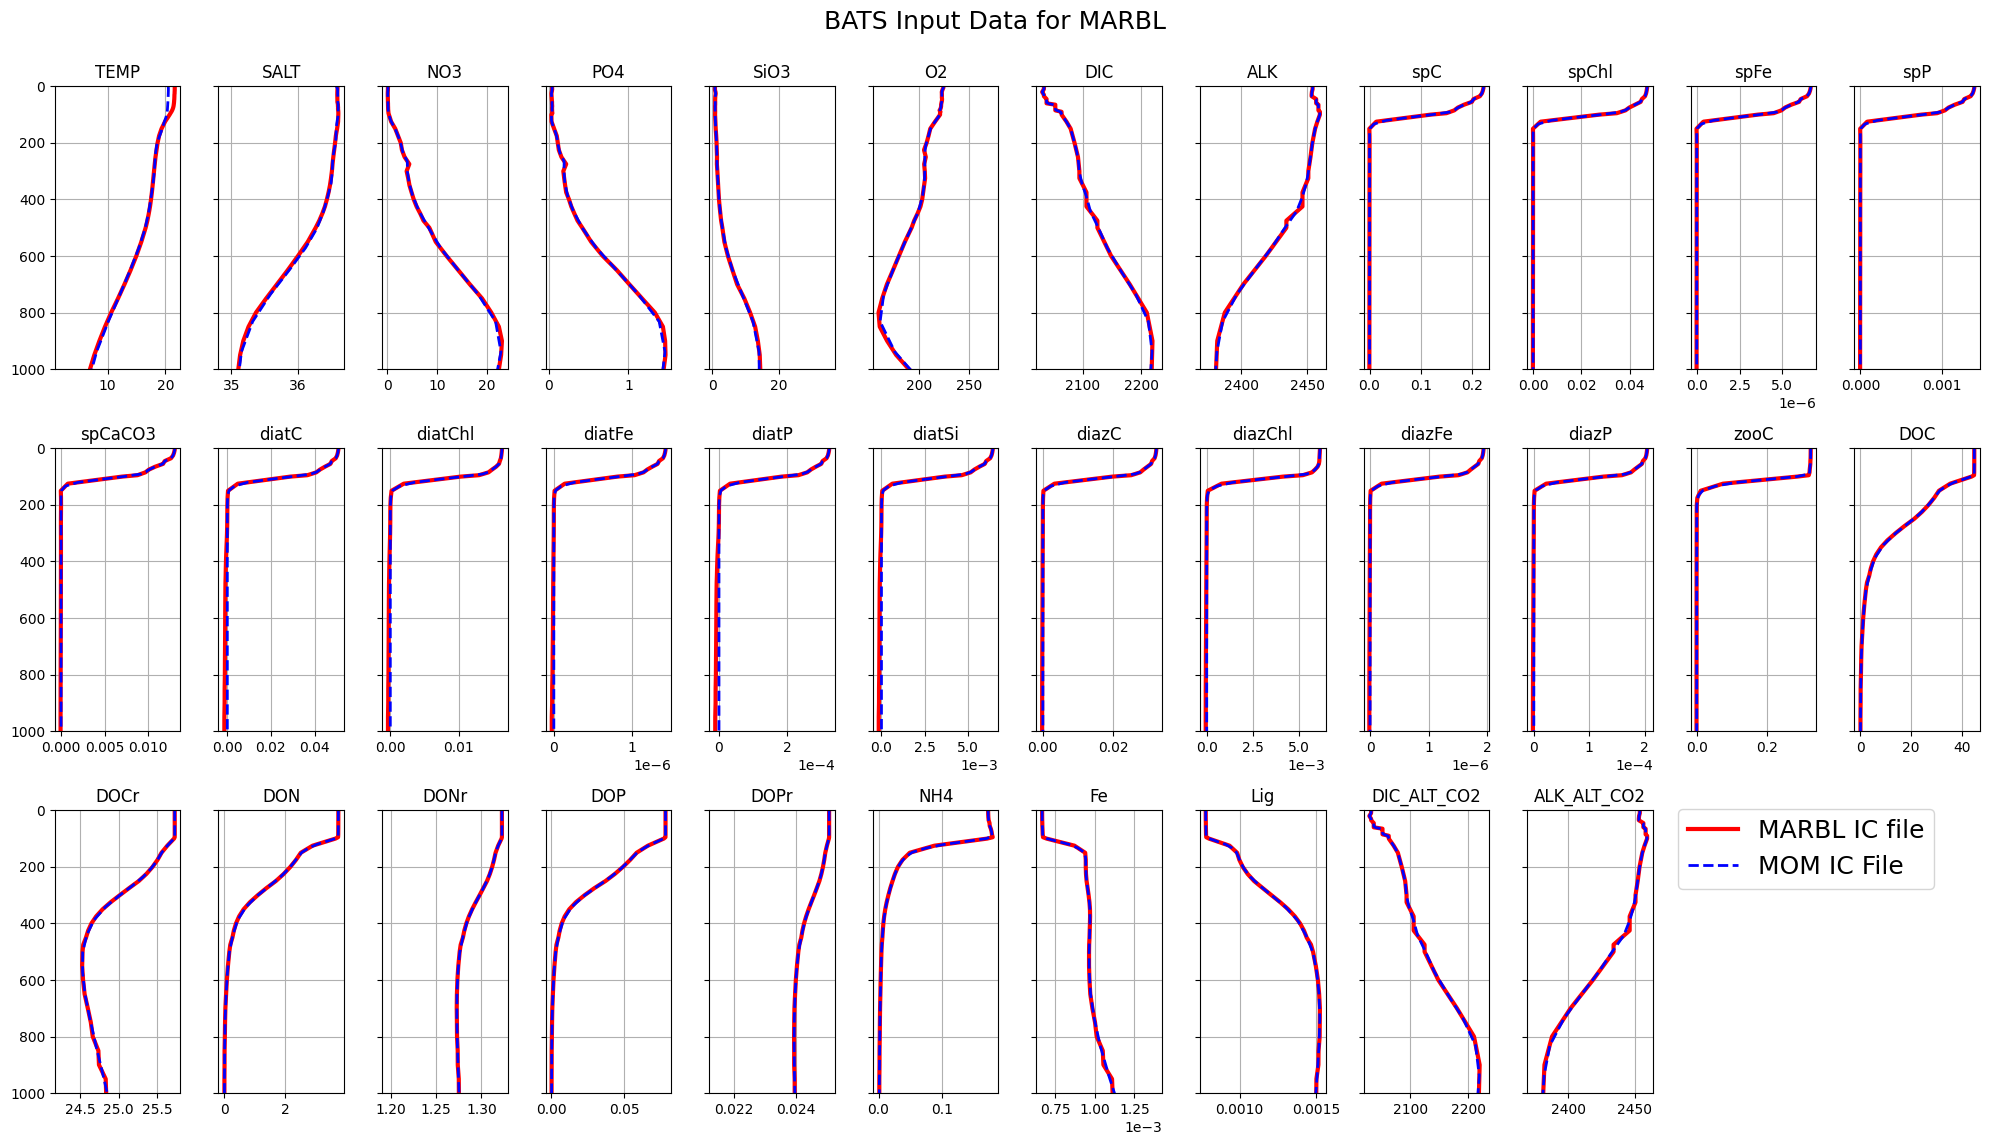

In [68]:
fig, axs = plt.subplots(nrows=3, ncols=13, figsize=(20, 12), sharey = True, dpi=100)
fig.suptitle("BATS Input Data for MARBL", fontsize=18, y=0.95)

for key, ax in zip(keys, axs.ravel()):
    ax.plot(MARBL_input[key][:,0,0],MARBL_input.DEPTH,'r',linewidth=3)
    ax.set_ylim([1000, 0])
    ax.set_title(key)
    ax.grid()
    #ax.set_xlabel(IC_FILE_COLUMN[key].units)
    ax.ticklabel_format(style='plain', axis='x')
    if key in ['spFe','diatFe','diatSi','diazChl','diatP','diazFe','diazP','Fe']:
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    if key == 'SALT':
        key = 'Salt'
    if key == 'TEMP':
        key = 'Temp'
    ax.plot(MOM_IC[key][0,:,0,0],MOM_IC.Layer,'--b',linewidth=2)

#fig.delaxes(axs[-1][-1])
#fig.delaxes(axs[-1][-2])
fig.tight_layout(rect=[0, 0, 1, 0.95])
ax.legend(['MARBL IC file','MOM IC File'],bbox_to_anchor=(1.1, 1.05),fontsize=18)



In [3]:
MOM_IC = xr.open_dataset('/glade/u/home/eyankovsky/MOM6-examples/ocean_only/single_column/KPP_MARBL/INPUT/BATS/ICs.nc')

In [4]:
print(MOM_IC)

<xarray.Dataset>
Dimensions:    (Interface: 49, Layer: 48, gridlat_t: 2, gridlon_t: 2)
Coordinates:
  * gridlon_t  (gridlon_t) float32 0.5 1.5
  * gridlat_t  (gridlat_t) float32 0.5 1.5
  * Layer      (Layer) float32 1.014e+03 1.018e+03 ... 1.038e+03 1.038e+03
Dimensions without coordinates: Interface
Data variables:
    PTEMP      (Layer, gridlat_t, gridlon_t) float32 ...
    SALT       (Layer, gridlat_t, gridlon_t) float32 ...
    eta        (Interface, gridlat_t, gridlon_t) float32 ...
Attributes:
    filename:  ICs.nc


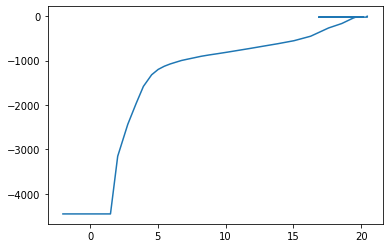

In [13]:
plt.plot(MOM_IC.PTEMP[:,1,1],MOM_IC.eta[:-1,1,1])

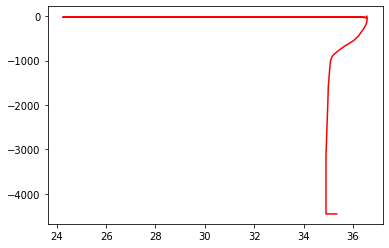

In [14]:
plt.plot(MOM_IC.SALT[:,1,1],MOM_IC.eta[:-1,1,1],'r')